<h2 style='text-align: center;'> Data Science Technology and Systems </h2>
<h3 style='text-align: center;'> Assignment 1: Predictive Modelling of Eating-Out Problem </h3>
<h3 style='text-align: center;'> Part A –Importing and Understanding Data </h3>
<h4 style='text-align: center;'> Pauline Armamento - u3246782 </h4>

## Introduction

This project aims to leverage a real-world dataset comprising over 10,000 Sydney restaurants from 2018 to predict restaurant ratings. The objective of this project is to conduct a comprehensive Exploratory Data Analysis (EDA), feature engineering, develop regression and classification models, and demonstrate practical deployment skills. 

### The following libraries were used to retrieve, explore, process and present data within the dataset.

In [42]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import geopandas as gpd
from shapely.geometry import Point
from bokeh.io import output_notebook, show
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.plotting import figure
from bokeh.palettes import Viridis256
from bokeh.layouts import column


import matplotlib.pyplot as plt

%matplotlib inline

os.getcwd()

'C:\\Users\\pauar\\Desktop\\UC\\DSTS\\DSTS Assignment'

## Exploring Data

### Data Description

The dataframe is comprised of 10,500 data entries with 17 columns ['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone', 'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes', 'groupon', 'color', 'cost_2', 'cuisine_color']

### Read Zomato Restaurant Dataset



In [37]:
# Define the directory path

df = pd.read_csv("data/zomato_df_final_data.csv")

print("DataFrame: zomato_df_final_data")
print("Number of rows:", df.shape[0])
print("Column names:", df.columns.tolist())


DataFrame: zomato_df_final_data
Number of rows: 10500
Column names: ['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone', 'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes', 'groupon', 'color', 'cost_2', 'cuisine_color']


To understand the contents of our dataframe, we want to look at what data types are present in each columnn. This information will be essential in guiding us for subsequent processing and task analysis within this assignment.

Here we observed a combination of numerical and categorical features that will be further processed for quantitative analysis and modeling. 

In [10]:
# Check data types
df.dtypes

address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object

#### Verify Column Contents

In addition to examining the data types, we wanted to see the degree of categories for specified columns ['subzone', 'cuisine', 'title', 'type']. This gives us an idea about the distributions of these categories that can provide insights to the restaurant landscape in Sydney.

In [3]:
# Define columns to check contents
columns_to_check = ['subzone', 'cuisine', 'title', 'type']

# Print Column Contents
for column in columns_to_check:
    print(f"Contents of column '{column}':")
    print(df[column].value_counts())
    print()



Contents of column 'subzone':
CBD                                         476
Surry Hills                                 260
Parramatta                                  225
Darlinghurst                                188
Chinatown                                   174
                                           ... 
The Sydney Boulevard Hotel, Darlinghurst      1
Pullman Quay Grand Sydney Harbour, CBD        1
Chullora                                      1
Marriott Sydney Harbour, Circular Quay        1
Holiday Inn Old Sydney, The Rocks             1
Name: subzone, Length: 572, dtype: int64

Contents of column 'cuisine':
['Cafe']                                   1745
['Thai']                                    542
['Chinese']                                 450
['Modern Australian']                       346
['Indian']                                  286
                                           ... 
['Cafe', 'Spanish', 'Italian', 'Tapas']       1
['Desserts', 'Steak', 'Tapas']    

## Data Pre-processing

In general, we check the data for missing values and treat them appropriately. However, because we will perform Feature Engineering in Part B, we will leave the data in its original form as we answer the tasks for Part A.

In [4]:
# Check for Missing values

print("Missing values in df:")
print(df.isna().sum())

Missing values in df:
address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64


## Part A – Importing and Understanding Data

### 1. How many unique cuisines are served by Sydney restaurants?

As we have seen the contents of the 'cuisine' column from the previous cell, it contains multiple values. To properly extract the values from each entry, we have converted each entry from string to a list using ast.literal_eval and used explode to separate each element within the list into rows.

In [5]:
# Convert cuisine column from string to list
df['cuisine'] = df['cuisine'].apply(ast.literal_eval)  

In [6]:
# Explode the lists into separate rows
df_exploded = df.explode('cuisine')

# Print exploded df
print(df_exploded.head())


                                          address  cost     cuisine  \
0                   371A Pitt Street, CBD, Sydney  50.0     Hot Pot   
0                   371A Pitt Street, CBD, Sydney  50.0  Korean BBQ   
0                   371A Pitt Street, CBD, Sydney  50.0         BBQ   
0                   371A Pitt Street, CBD, Sydney  50.0      Korean   
1   Shop 7A, 2 Huntley Street, Alexandria, Sydney  80.0        Cafe   

         lat                                               link         lng  \
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1 -33.910999  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
0  02 

To answer how many unique cuisines are served by Sydney restaurants. We counted the number of unique values in the cuisine column. The input consisted of the distinct values present in the 'cuisine' column, and the output yielded the total number of unique cuisines served by Sydney establishments.


In [7]:
# Count the number of unique cuisines
unique_cuisines = df_exploded['cuisine'].nunique()
print(f"Number of unique cuisines served by Sydney restaurants: {unique_cuisines}")

Number of unique cuisines served by Sydney restaurants: 134


To visually represent the frequency of different cuisines in Sydney restaurants, we created a bar chart. The results indicate that 'Cafe' is the most prevalent cuisine, followed by 'Modern Australian', 'Chinese', 'Italian', and 'Pizza'. This visualization provides a clear overview of the culinary landscape in Sydney.

In [8]:
# Frequency count of each cuisine
cuisine_counts = df_exploded['cuisine'].value_counts()

cuisine_counts

Cafe                 3162
Modern Australian     981
Chinese               863
Italian               820
Pizza                 744
                     ... 
Swiss                   1
Dutch                   1
Kiwi                    1
Syrian                  1
Ukrainian               1
Name: cuisine, Length: 134, dtype: int64

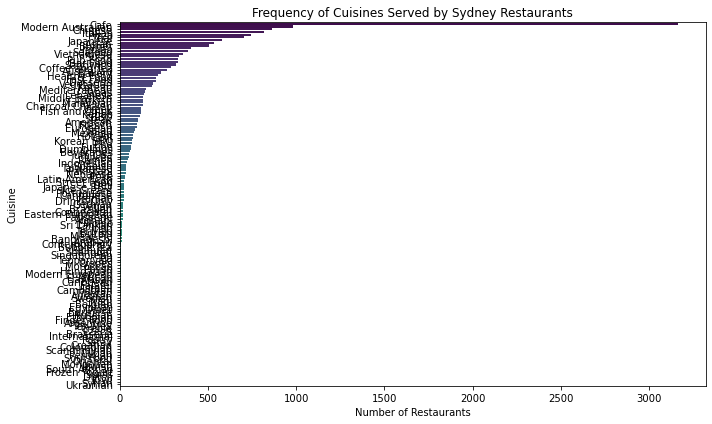

In [28]:
# Cuisine Frequency Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette='viridis')
plt.title('Frequency of Cuisines Served by Sydney Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()

A pie chart was employed to visualize the distribution of cuisines served. The results confirm the dominance of 'Cafe' cuisine, comprising 19% of the total, followed by 'Modern Australian' (5.9%), 'Chinese' (5.2%), 'Italian' (4.9%), and 'Pizza' (4.5%).


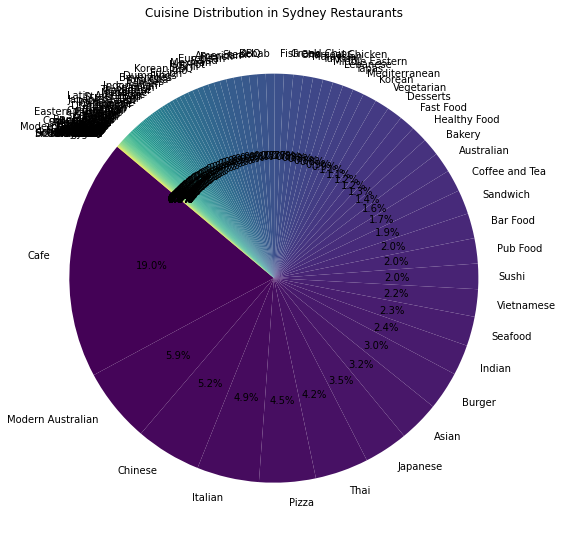

In [34]:
# Cuisine Distribution Pie chart
plt.figure(figsize=(8, 8))
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(cuisine_counts)))
plt.title('Cuisine Distribution in Sydney Restaurants')
plt.tight_layout()
plt.show()

To enhance the readability of the visualizations, cuisines with a distribution of less than 3% were grouped into an 'Others' category. This approach allowed for a more readable and informative representation of the data through a frequency bar plot and a distribution pie chart, highlighting the dominant culinary offerings in Sydney.

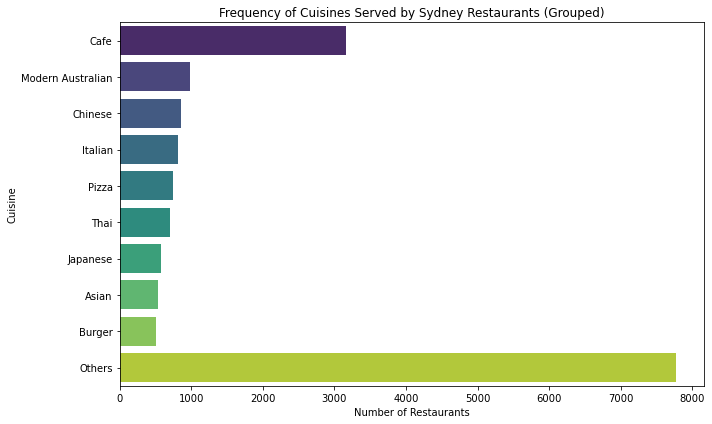

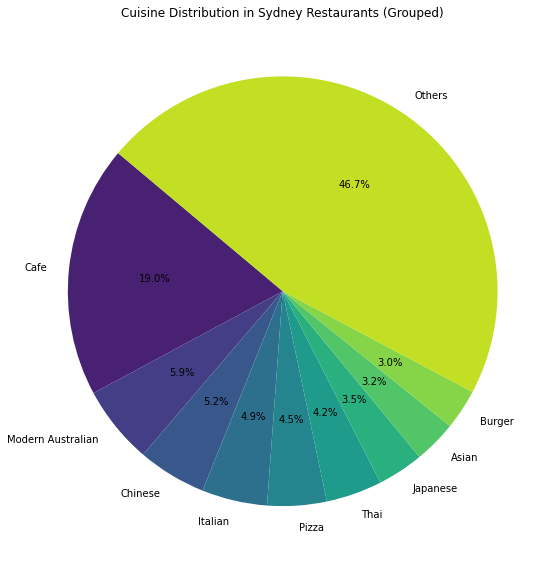

In [35]:
# Set 3% threshold
total_cuisines = cuisine_counts.sum()
threshold = 0.03 * total_cuisines

# Group cuisines with less than 3% frequencies into "Others"
cuisine_counts_grouped = cuisine_counts.copy()
cuisine_counts_grouped['Others'] = cuisine_counts[cuisine_counts < threshold].sum()
cuisine_counts_grouped = cuisine_counts_grouped[cuisine_counts_grouped >= threshold]

# Cuisine Frequency Bar plot (grouped)
plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_counts_grouped.values, y=cuisine_counts_grouped.index, palette='viridis')
plt.title('Frequency of Cuisines Served by Sydney Restaurants (Grouped)')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()

# Cuisine Distribution Pie chart (grouped)
plt.figure(figsize=(8, 8))
plt.pie(cuisine_counts_grouped, labels=cuisine_counts_grouped.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(cuisine_counts_grouped)))
plt.title('Cuisine Distribution in Sydney Restaurants (Grouped)')
plt.tight_layout()
plt.show()


### 2. Which suburbs (top 3) have the highest number of restaurants?

To identify the suburbs with the highest number of restaurants we utilized value counts on the 'subzone' column. The results showed 'CBD' with the most number with 476 restaurants, followed by Surry Hills (260) and Parramatta (225). We visualised these values by presenting a bar chart to compare the top 3 suburbs.

In [9]:
# Count of restaurants in each subzone
subzone_counts = df['subzone'].value_counts()

subzone_counts

CBD                                         476
Surry Hills                                 260
Parramatta                                  225
Darlinghurst                                188
Chinatown                                   174
                                           ... 
The Sydney Boulevard Hotel, Darlinghurst      1
Pullman Quay Grand Sydney Harbour, CBD        1
Chullora                                      1
Marriott Sydney Harbour, Circular Quay        1
Holiday Inn Old Sydney, The Rocks             1
Name: subzone, Length: 572, dtype: int64

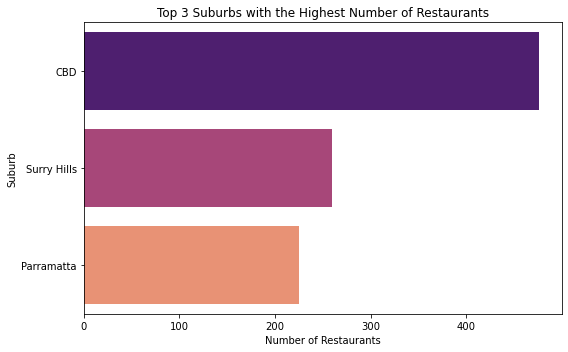

In [39]:
# Get the top 3 subzones
top_3_subzone = subzone_counts.head(3)

# Bar Plot of top 3 subzones
plt.figure(figsize=(8, 5))
sns.barplot(x=top_3_subzone.values, y=top_3_subzone.index, palette='magma')

plt.title('Top 3 Suburbs with the Highest Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Suburb')

plt.tight_layout()
plt.show()


### 3. Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ ratings are rarely expensive”. Do you agree with this statement or not? Please support your answer with numbers and visuals. (hint: use stacked bar chart or histogram to relate ‘cost’ to 'rating_text')

To analyse the potential correlation between restaurant cost and ratings, we segmented the cost variable into cost categories of Low: <20, Average: 20-50, Expensive: >50. We then created a cross tabulation between 'rating_text' and 'cost_category' to show the frequency of restaurants in each category for each rating category. 

In [41]:
# Set cost categories 
bins = [0, 20, 50, df['cost'].max()]  
labels = ['Low', 'Average', 'Expensive']
df['cost_category'] = pd.cut(df['cost'], bins=bins, labels=labels)
print(df['cost_category'])

0          Average
1        Expensive
2        Expensive
3        Expensive
4        Expensive
           ...    
10495      Average
10496          Low
10497          Low
10498          Low
10499    Expensive
Name: cost_category, Length: 10500, dtype: category
Categories (3, object): ['Low' < 'Average' < 'Expensive']


### The results showed that average ratings are the most common across all cost categories regardless of their price point.

In [42]:
# Create cross tabulation on rating cost counts
rating_cost_counts = pd.crosstab(df['rating_text'], df['cost_category'])
rating_cost_counts


cost_category  Low  Average  Expensive
rating_text                           
Average        198     2622       1600
Excellent        5       16         30
Good            37      935        931
Poor             4      109         88
Very Good        7      191        308

### The results also showed that, while there are instances of expensively priced restaurants receiving 'Excellent' ratings, the majority of the ratings are concentrated within the 'Average' cost category. This suggests that other factors beyond cost, such as food quality, customer service, and ambiance, may potentially be considered for achieving excellent ratings. In addition, 'Poor' ratings is relatively low across all price ranges, indicating that a small percentage of restaurants receive poor ratings, regardless of their price.

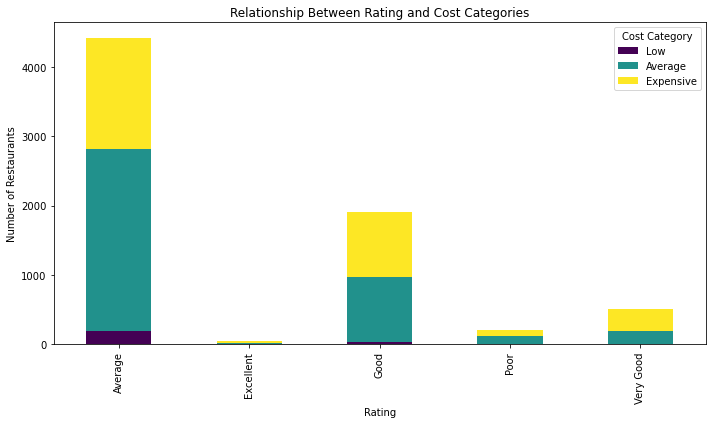

In [43]:
# Plot stacked bar chart
rating_cost_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Relationship Between Rating and Cost Categories')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.legend(title='Cost Category')
plt.tight_layout()
plt.show()


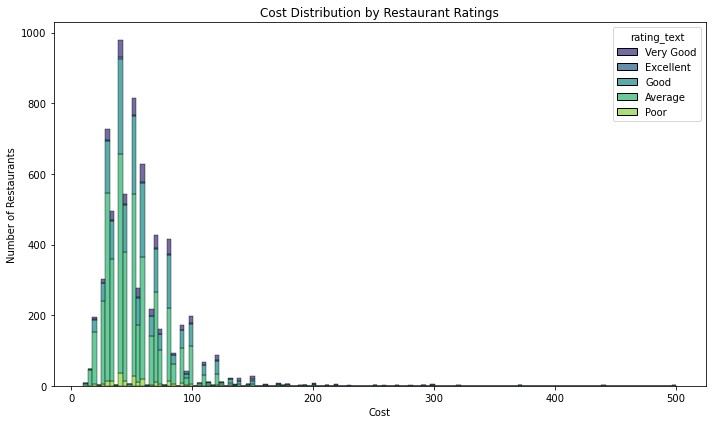

In [44]:
# Plot histogram of the distribution of cost for each rating
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='cost', hue='rating_text', multiple='stack', palette='viridis')

plt.title('Cost Distribution by Restaurant Ratings')
plt.xlabel('Cost')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)



EDA was performed for the variables 'Cost', 'Rating', and 'Type'. As mentioned in the early part of this assignment, we have yet to resolve the missing values in the dataframe because it will be treated in Part B of this assignment. For this part we will continue to use the original file ignoring the existing missing values from the specified variables in this EDA report. 

The cost descriptive statistics summarise the key characteristics of the 10,154 cost data in the dataset. The average cost per restaurant is 51.15 dollars, with a standard deviation of 27.79, indicating a relatively wide range of prices. The minimum and maximum costs are 8 and 500 units respectively, suggesting a significant variation in pricing among the restaurants. Additionally, the percentiles show that 25% of restaurants have a cost below 30, 50% have a cost below 45, and 75% have a cost below 60.

In [48]:
# Print Cost Descriptive Statistics
cost_stats = df['cost'].describe()
print("Cost Descriptive Statistics:")
print(cost_stats)

Cost Descriptive Statistics:
count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64


The histogram shows the distribution of restaurant costs in the dataset. It is right-skewed, indicating that there are a few restaurants with very high costs, while the majority of restaurants have costs below 100. The peak of the histogram is between 50 and 100, suggesting that this is the most common cost range for restaurants in the dataset. Overall, the shape of the histogram suggests that the cost distribution is not normally distributed.

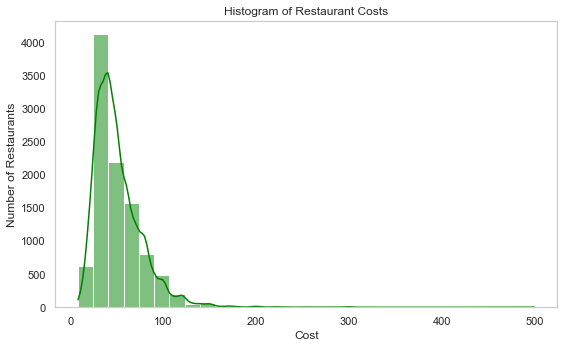

In [52]:
# Set style for the plots
sns.set(style="whitegrid")

# Plot Histogram of Restaurant Costs
plt.figure(figsize=(8, 5))
sns.histplot(df['cost'], bins=30, kde=True, color='green')
plt.title('Histogram of Restaurant Costs')
plt.xlabel('Cost')
plt.ylabel('Number of Restaurants')
plt.grid(None)
plt.tight_layout()
plt.show()


The rating descriptive statistics summarise the key characteristics of the 7,184 rating data in the dataset. The average rating is 3.28 out of 5, indicating a generally positive overall rating. The standard deviation of 0.45 suggests a moderate spread in ratings, with the majority of restaurants receiving ratings close to the average. The minimum and maximum ratings of 1.8 and 4.9, respectively, demonstrate a range from below average to excellent. Additionally, the percentiles indicate that 25% of restaurants have a rating below 3.0, 50% have a rating below 3.3, and 75% have a rating below 3.6.

In [53]:
# Print Rating Descriptive Statistics
rating_stats = df['rating_number'].describe()
print("\nRating Descriptive Statistics:")
print(rating_stats)


Rating Descriptive Statistics:
count    7184.000000
mean        3.283672
std         0.454580
min         1.800000
25%         3.000000
50%         3.300000
75%         3.600000
max         4.900000
Name: rating_number, dtype: float64


The histogram shows the distribution of restaurant ratings in the dataset. It is approximately normally distributed, with a peak around 3.3. This indicates that the majority of restaurants have ratings close to 3.3, and the distribution of ratings is relatively symmetrical. The tails of the histogram are relatively short, suggesting that there are fewer restaurants with very high or very low ratings. Overall, the histogram suggests that the restaurant ratings are generally clustered around the average rating of 3.28.

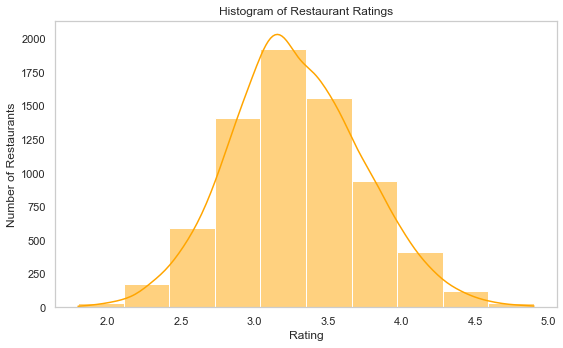

In [55]:
# Plot Histogram of Restaurant Rating
plt.figure(figsize=(8, 5))
sns.histplot(df['rating_number'], bins=10, kde=True, color='orange')
plt.title('Histogram of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.grid(None)
plt.tight_layout()
plt.show()

The restaurant descriptive statistics summarise that 'Casual Dining' is the most common restaurant type in Sydney with 4854 count value. Followed by Cafe (2767), Fast Food (557), Food Court (480), and Pub (284).

In [56]:
# Print Restaurant Type Descriptive Statistics
type_counts = df['type'].value_counts()
print("\nRestaurant Type Frequency:")
print(type_counts)


Restaurant Type Frequency:
['Casual Dining']                    4854
['Café']                             2767
['Fast Food']                         557
['Food Court']                        480
['Pub']                               284
                                     ... 
['Club', 'Casual Dining']               1
['Dessert Parlour', 'Fast Food']        1
['Dessert Parlour', 'Food Court']       1
['Club', 'Pub']                         1
['Food Court', 'Beverage Shop']         1
Name: type, Length: 66, dtype: int64


The bar plot shows the frequency of different restaurant types. The bars are sorted in descending order of frequency, with "Casual Dining" being the most frequent type.

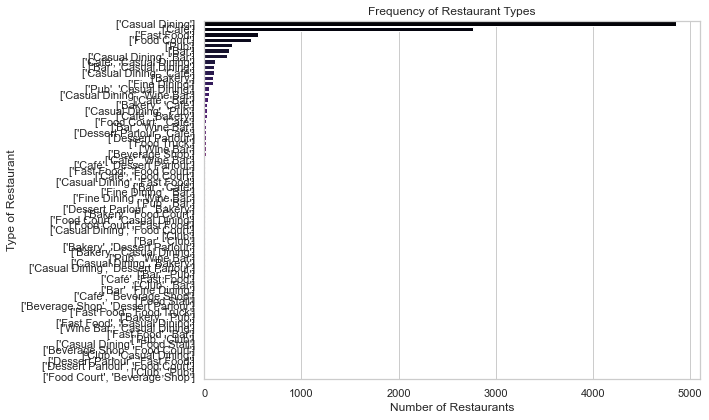

In [57]:
# Bar Plot of Restaurant Type 
plt.figure(figsize=(10, 6))
sns.countplot(y=df['type'], order=df['type'].value_counts().index, palette='magma')
plt.title('Frequency of Restaurant Types')
plt.xlabel('Number of Restaurants')
plt.ylabel('Type of Restaurant')
plt.tight_layout()
plt.show()




To enhance the clarity and interpretability of the visualization, the restaurant types were organized to showcase the top 15 most prevalent categories. The remaining less frequent types were consolidated into an 'Others' category, providing a more concise representation. 

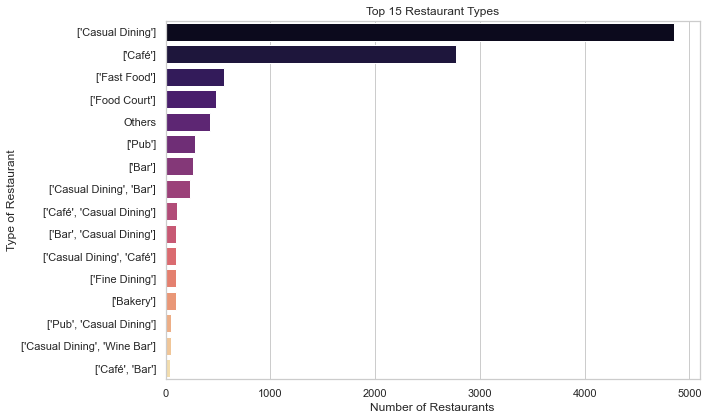

In [59]:
# Group the top 15 restaurant types
top_15_types = df['type'].value_counts().head(15).index

# Group the remaining restaurant Types to Others
df['type_modified'] = df['type'].apply(lambda x: x if x in top_15_types else 'Others')

# Count of modified restaurant types
type_modified_counts = df['type_modified'].value_counts()

# 4. Plot top 15 restaurant types and "Others"
plt.figure(figsize=(10, 6))
sns.countplot(y=df['type_modified'], order=type_modified_counts.index, palette='magma')

# 5. Add titles and labels
plt.title('Top 15 Restaurant Types')
plt.xlabel('Number of Restaurants')
plt.ylabel('Type of Restaurant')
plt.tight_layout()
plt.show()



In [47]:
# Export csv file for Tableau Dashboard

# Select columns to export ['Cost', 'Rating', 'Type']
columns_to_export = ['cost', 'rating_number', 'type']
filtered_df = df[columns_to_export]

# Export to CSV
filtered_df.to_csv('filtered_data.csv', index=False)

## Produce Cuisine Density Map

Using the provided “sydney.geojson” file and restaurant geographic information as inputs, we created a python function as output to show a cuisine density map. This shows the spatial distribution of various cuisines across different suburbs, with color-coding indicating the concentration of restaurants serving the specified cuisine. 

### Plotted Sydney Geojson

We first plotted the provided “sydney.geojson” file to get an idea of the geographic context that will be used as the background for the subsequent cuisine density map.

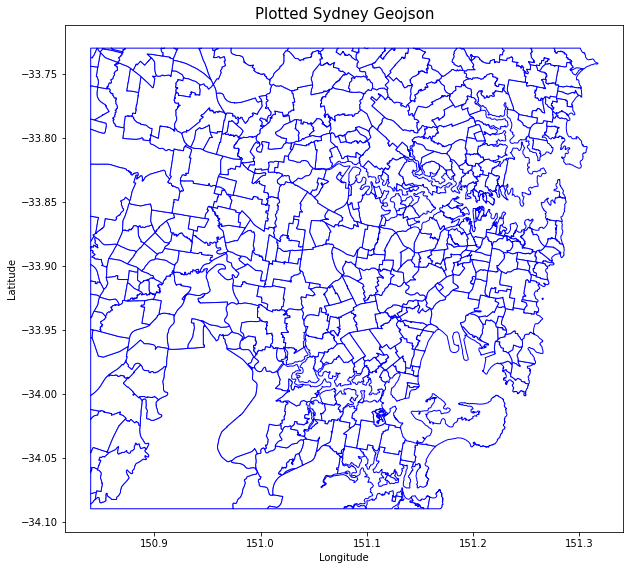

In [18]:
# Load the Sydney GeoJSON file 
gdf = gpd.read_file("data/sydney.geojson")

# Plot Sydney GeoJSON file 
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='white', edgecolor='blue')

ax.set_title('Plotted Sydney Geojson', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


### Function to Plot Cuisine Density Map

The python function 'plot_cuisine_density' was created to generate a cuisine density map, which visually represents the spatial distribution of various cuisines across different suburbs. The map employs color coding to indicate the concentration of restaurants offering each specific cuisine. This function takes the geodataframe, restaurant dataframe, and cuisine type as input while plots the cuisine density map as output.

We initially dropped any rows within the dataframe with missing values within the lat, lng, and cuisine columns. Next, converted the dataframe to geodata frame as we prepare it to perform spatial join with the sydney suburb polygons. After the application of spatial join, we enure that the cuisine column is string value. We then, specify to filter the restaurants based on the cuisine type. We then, count the number of restaurants in each suburb using the SSC_CODE and merge them to the original dataframe. Finally, we require the plot of suburbs and highlights the suburbs that contain restaurants serving the selected cuisine type.

In [28]:
def plot_cuisine_density(gdf, df, cuisine_type):
    
    # Drop missing rows within lat/lng/cuisine column
    df = df.dropna(subset=['lat', 'lng', 'cuisine'])
    
    # Convert to Geodataframe
    df_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat), crs='EPSG:4326')

    # Use geopandas spatial join
    result = gpd.sjoin(df_gdf, gdf, how='right', predicate='within')

    # Convert cuisine to string
    result["cuisine"] = result["cuisine"].astype(str)
    
    # Apply filter for chosen cuisine type
    cuisine_restaurant_suburbs = result[result['cuisine'].str.contains(cuisine_type, case=False)]

    # Count the number of restaurants in each suburb
    cuisine_restaurant_suburbs_count = cuisine_restaurant_suburbs["SSC_CODE"].value_counts()
    sub_count = pd.DataFrame({"SSC_CODE": cuisine_restaurant_suburbs_count.index, "count": cuisine_restaurant_suburbs_count.values})

    # Merge the count into the original Dataframe
    cuisine_restaurant_suburbs_count = cuisine_restaurant_suburbs.drop_duplicates(subset="SSC_CODE")
    cuisine_count_gdf = pd.merge(cuisine_restaurant_suburbs_count, sub_count, on="SSC_CODE", how="outer")

    # Plot Cuisine Density Map
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    gdf.plot(ax=ax, color='white', edgecolor="black")
    cuisine_count_gdf.plot(column='count', cmap='viridis', linewidth=0.5, ax=ax, 
                           legend=True, edgecolor='k', alpha=0.7, 
                           legend_kwds={'label': f"{cuisine_type} Restaurant Count"})

    ax.set_title(f"{cuisine_type} Restaurant Distribution in Sydney Suburbs", fontsize=15)
    plt.show()



### Call on plot_cuisine_density function

We call on the plot_cuisine_density function with 'Italian' cuisine.

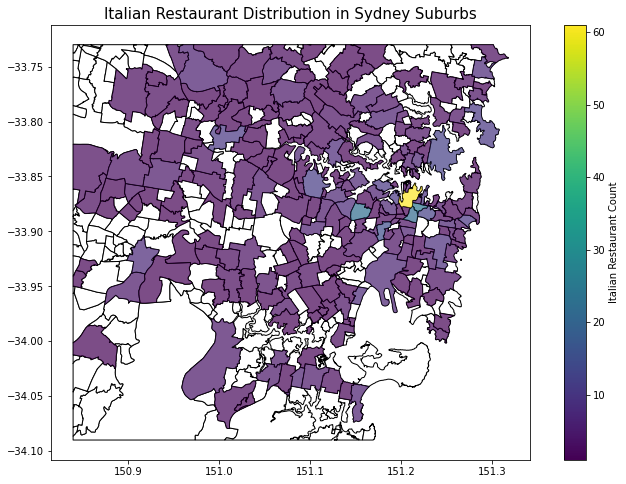

In [29]:
# Call plot_cuisine_density function with 'Italian' cuisine.

plot_cuisine_density(gdf, df, 'Italian')

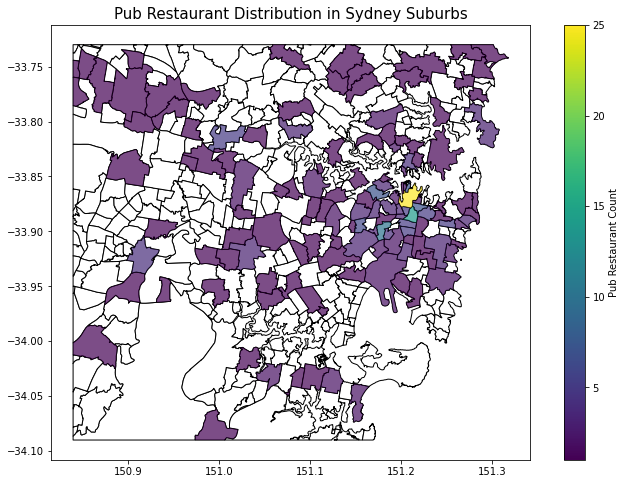

In [30]:
# Call plot_cuisine_density function with 'Pub' cuisine.

plot_cuisine_density(gdf, df, 'Pub')

## Interactive Plotting library Bokeh

For the interactive plot we utilised Bokeh as it readily available and simple for creating visualisations. Similar to the initial cuisine density plot function, the created 'plot_cuisine_density_bokeh' function delivers a visual representation of cuisine density but offers enhanced interactivity and customization options compared to its predecessor.

### Limitations in Non-interactive and Interactive Plots

### Minimal Information 
Non-interactive plots provide limited information as they only present general distribution of restaurant cuisines around Sydney. Using interactive plot tools such as hover the hovel shows the suburb name and the number of restaurants. This makes the plot easier to understand and use.

### Lack of Customisation
Non-interactive plots show a fixed view of the plot whereas interactive plots can generate customised views by using zoom in and out options or pan tools that can aide users to dynamically change what is being displayed without manually generating a new plot.

### Function for Interactive 'plot_cuisine_density_bokeh'

In [40]:
import geopandas as gpd
from bokeh.io import output_notebook, show
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.plotting import figure
from bokeh.palettes import Viridis256
from bokeh.layouts import column
import pandas as pd

# Enable output within a notebook
output_notebook()

def plot_cuisine_density_bokeh(gdf, df, cuisine_type):
    
    # Drop missing rows within lat/lng/cuisine column
    df = df.dropna(subset=['lat', 'lng', 'cuisine'])
    
    # Convert to Geodataframe
    df_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat), crs='EPSG:4326')

    # Spatial join between restaurants and suburbs
    result = gpd.sjoin(df_gdf, gdf, how='right', predicate='within')

    # Convert cuisine to string
    result["cuisine"] = result["cuisine"].astype(str)
    
    # Apply filter for chosen cuisine type
    cuisine_restaurant_suburbs = result[result['cuisine'].str.contains(cuisine_type, case=False)]

    # Count the number of restaurants in each suburb
    cuisine_restaurant_suburbs_count = cuisine_restaurant_suburbs["SSC_CODE"].value_counts()
    sub_count = pd.DataFrame({"SSC_CODE": cuisine_restaurant_suburbs_count.index, "count": cuisine_restaurant_suburbs_count.values})

    # Merge the count into the original DataFrame
    cuisine_restaurant_suburbs_count = cuisine_restaurant_suburbs.drop_duplicates(subset="SSC_CODE")
    cuisine_count_gdf = pd.merge(cuisine_restaurant_suburbs_count, sub_count, on="SSC_CODE", how="outer")

    # Convert the Geodataframe to GeoJSONDataSource for Bokeh plotting
    geo_source = GeoJSONDataSource(geojson=cuisine_count_gdf.to_json())
    
    # Set up color mapper based on cuisine count
    color_mapper = LinearColorMapper(palette=Viridis256, low=cuisine_count_gdf['count'].min(), high=cuisine_count_gdf['count'].max())
    
    # Create the figure
    p = figure(title=f"{cuisine_type} Restaurant Density in Sydney Suburbs",
               plot_height=600, plot_width=800,
               tools="pan, wheel_zoom, reset, hover, save",
               tooltips=[("Suburb", "@SSC_NAME"), (f"{cuisine_type} Count", "@count")])

    # Plot suburbs polygons with cuisine count
    p.patches('xs', 'ys', source=geo_source,
              fill_color={'field': 'count', 'transform': color_mapper},
              line_color="black", line_width=0.5, fill_alpha=0.7)

    # Add color bar
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, width=8, location=(0, 0))
    p.add_layout(color_bar, 'right')

    # Show plot
    show(p)




Loading BokehJS ...

In [44]:
# Call plot_cuisine_density_bokeh function for 'Thai' cuisine

plot_cuisine_density_bokeh(gdf, df, "Thai")

In [41]:
# Call plot_cuisine_density_bokeh function for 'Chinese' cuisine 

plot_cuisine_density_bokeh(gdf, df, "Chinese")

### Conclusion

This part of this assignment showcases the skills learned to understand the dataset and develop intuition about the data. We have employed exploratory data analysis and graphical modules such as Matplotlib, Seaborn and interactive plot library Bokeh.